# Classification of rice by type with Decision Tree Classifier

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [3]:
df = pd.read_csv('data/riceClassification.csv')

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [10]:
df.Class.unique()

array([1, 0], dtype=int64)

Jasmin - 1

Gonen - 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [6]:
df.shape

(18185, 12)

In [23]:
df = df.drop('id', axis=1)

### EDA

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,18185.0,7036.492989,1467.197150,2522.000000,5962.000000,6660.000000,8423.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,145.675910,153.883750,160.056214,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,51.393151,55.724288,70.156593,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.891617,0.923259,0.941372,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,6125.000000,6843.000000,8645.000000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,87.126656,92.085696,103.559146,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.538530,0.601194,0.695664,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,333.990000,353.088000,373.003000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.650962,0.701941,0.769280,0.904748
AspectRation,18185.0,2.599081,0.434836,1.358128,2.208527,2.602966,2.964101,3.911845


<AxesSubplot: xlabel='Class', ylabel='count'>

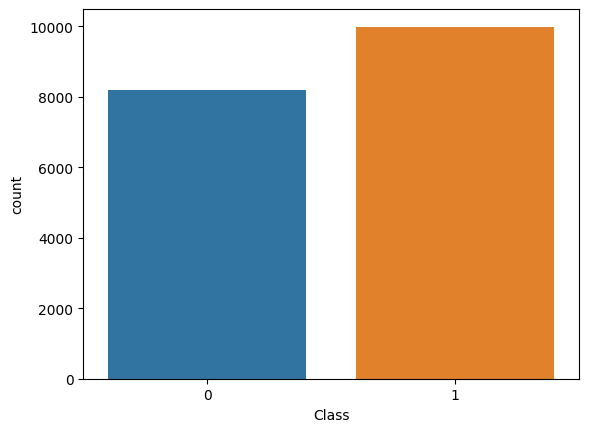

In [25]:
sns.countplot(x='Class', data=df)

* This is a balanced dataset

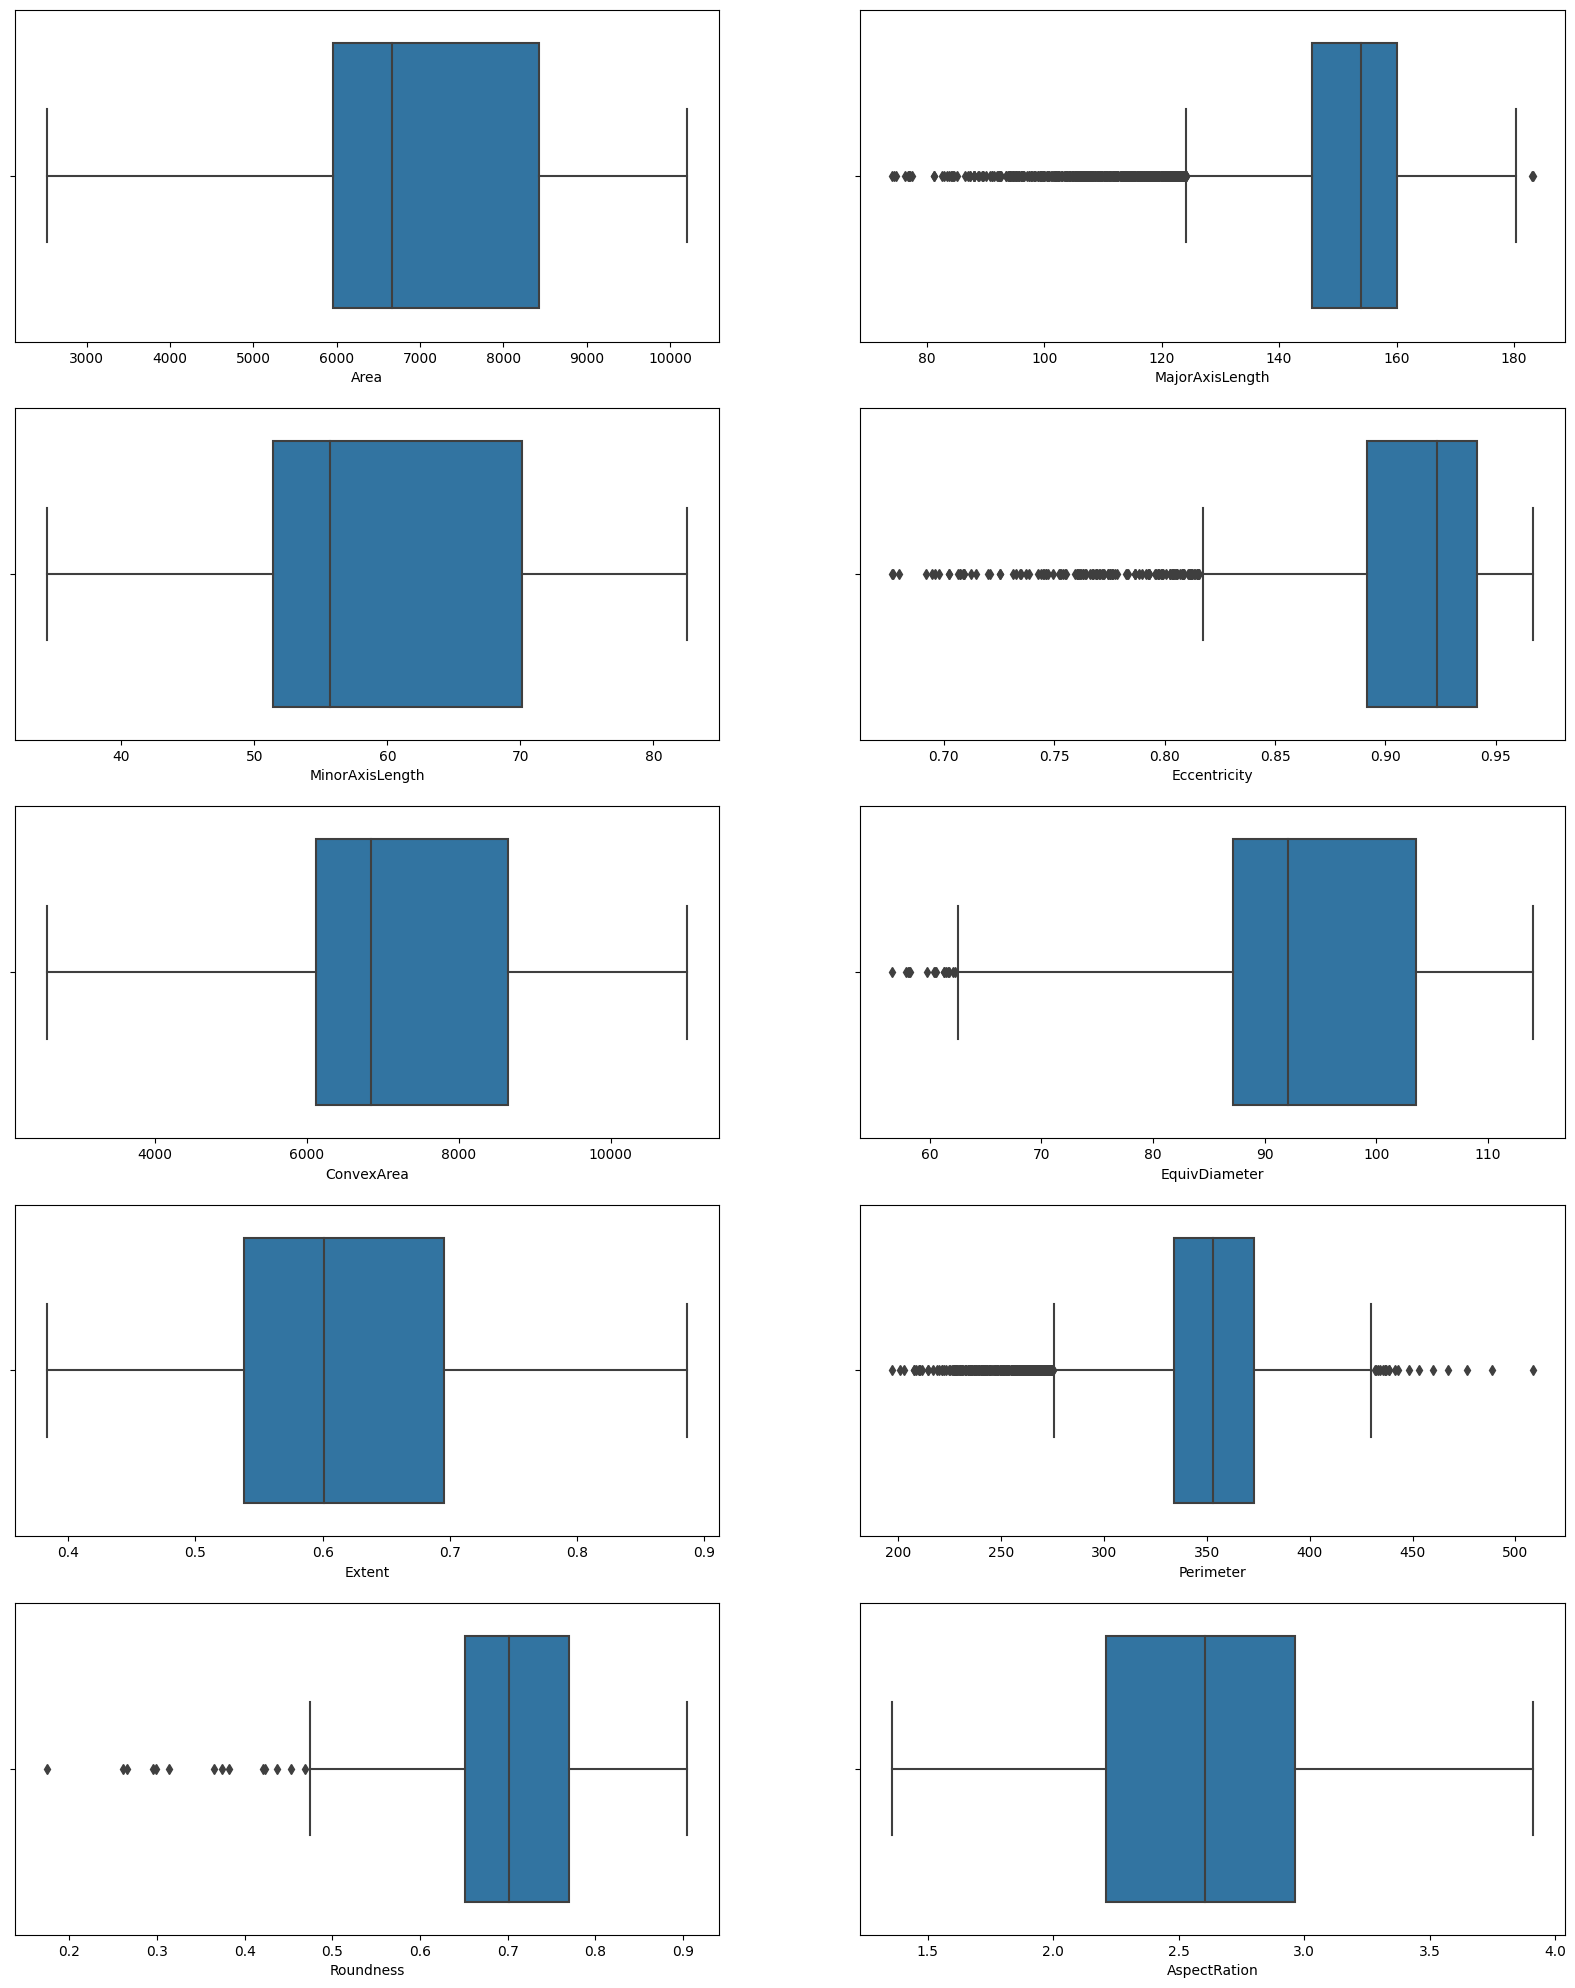

In [26]:
#box plotes of features
fig, axes = plt.subplots(5,2, figsize=(20,25))
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k])
        k=k+1

* There are outliers in some columns

### Data Preprocessing

In [18]:
#checking for null values
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [20]:
#checking for duplicated entries
df.duplicated().sum()

0

#### Handling outliers

In [30]:
# Calculating the IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower
    
# Remove the outliers
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    return main_df

# Resetting the dataframe index
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=['index'],inplace=True)
    return main_df

In [31]:
main_df = df

for i in range(0,len(main_df.columns)-1):
    upper, lower = iqr_calculation(main_df,df[df.columns[i]])
    main_df = remove_outliers(main_df,upper,lower)
    final_df = reset_dataframe(main_df)

In [32]:
final_df.shape

(17483, 11)

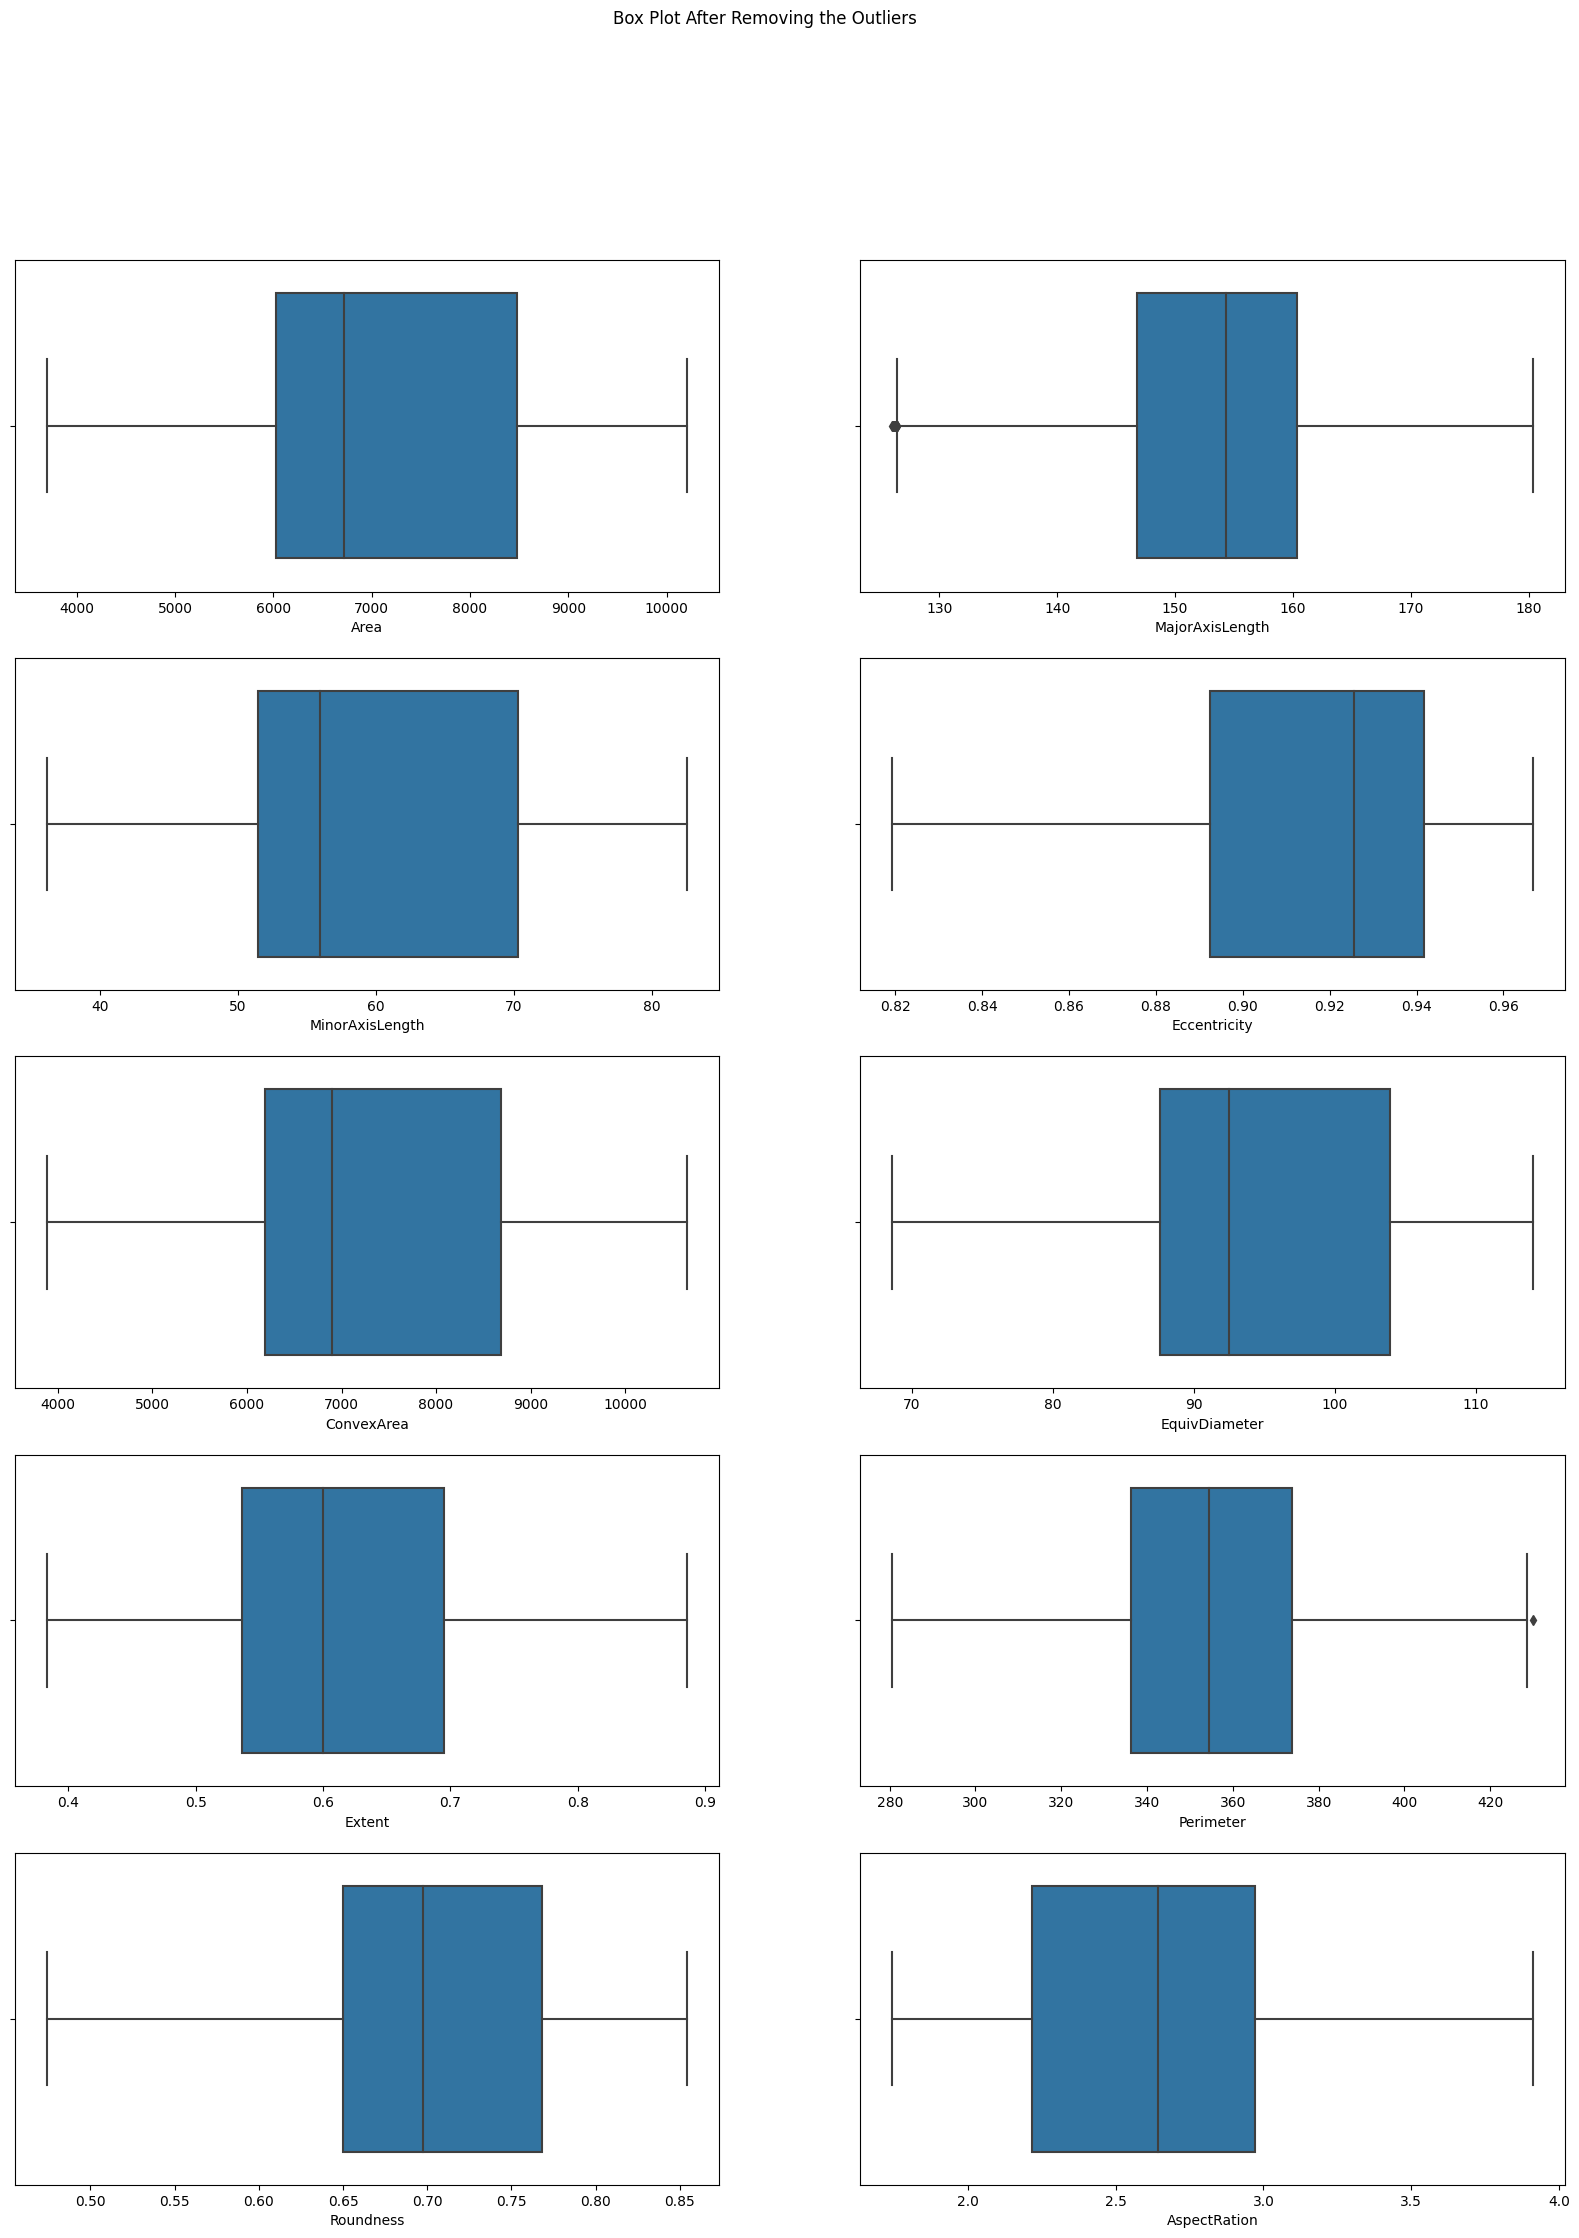

In [36]:
#boxplot after removing outliers
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,5):
    for j in range(0,2):
        col_name = final_df.columns[k]
        sns.boxplot(ax=axes[i,j], data=final_df,x=col_name)
        k=k+1

In [37]:
final_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,1
1,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,1
2,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,1
3,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,1
4,6063,131.291578,60.178119,0.888769,6203,87.861547,0.789453,313.372,0.775849,2.181716,1


In [38]:
#seperating features and target

X = final_df.drop('Class', axis=1)
y = final_df['Class']

In [39]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Model training

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [55]:
dt.get_depth()

17

### Model evaluation

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

ypred = dt.predict(X_test)


print("Confustion matrix : ")
print(confusion_matrix(y_test, ypred))
print()
print ("The accuracy of model is : ", accuracy_score(y_test, ypred))
print()
print("Precision score for model is :", precision_score(y_test, ypred))
print()
print("Recall score for model is :", recall_score(y_test, ypred))
print()
print("f1 score for model is :", f1_score(y_test, ypred))

Confustion matrix : 
[[1576   22]
 [  24 1875]]

The accuracy of model is :  0.9868458678867601

Precision score for model is : 0.9884027411702688

Recall score for model is : 0.9873617693522907

f1 score for model is : 0.9878819810326659


### Visaulaizing Decision Tree

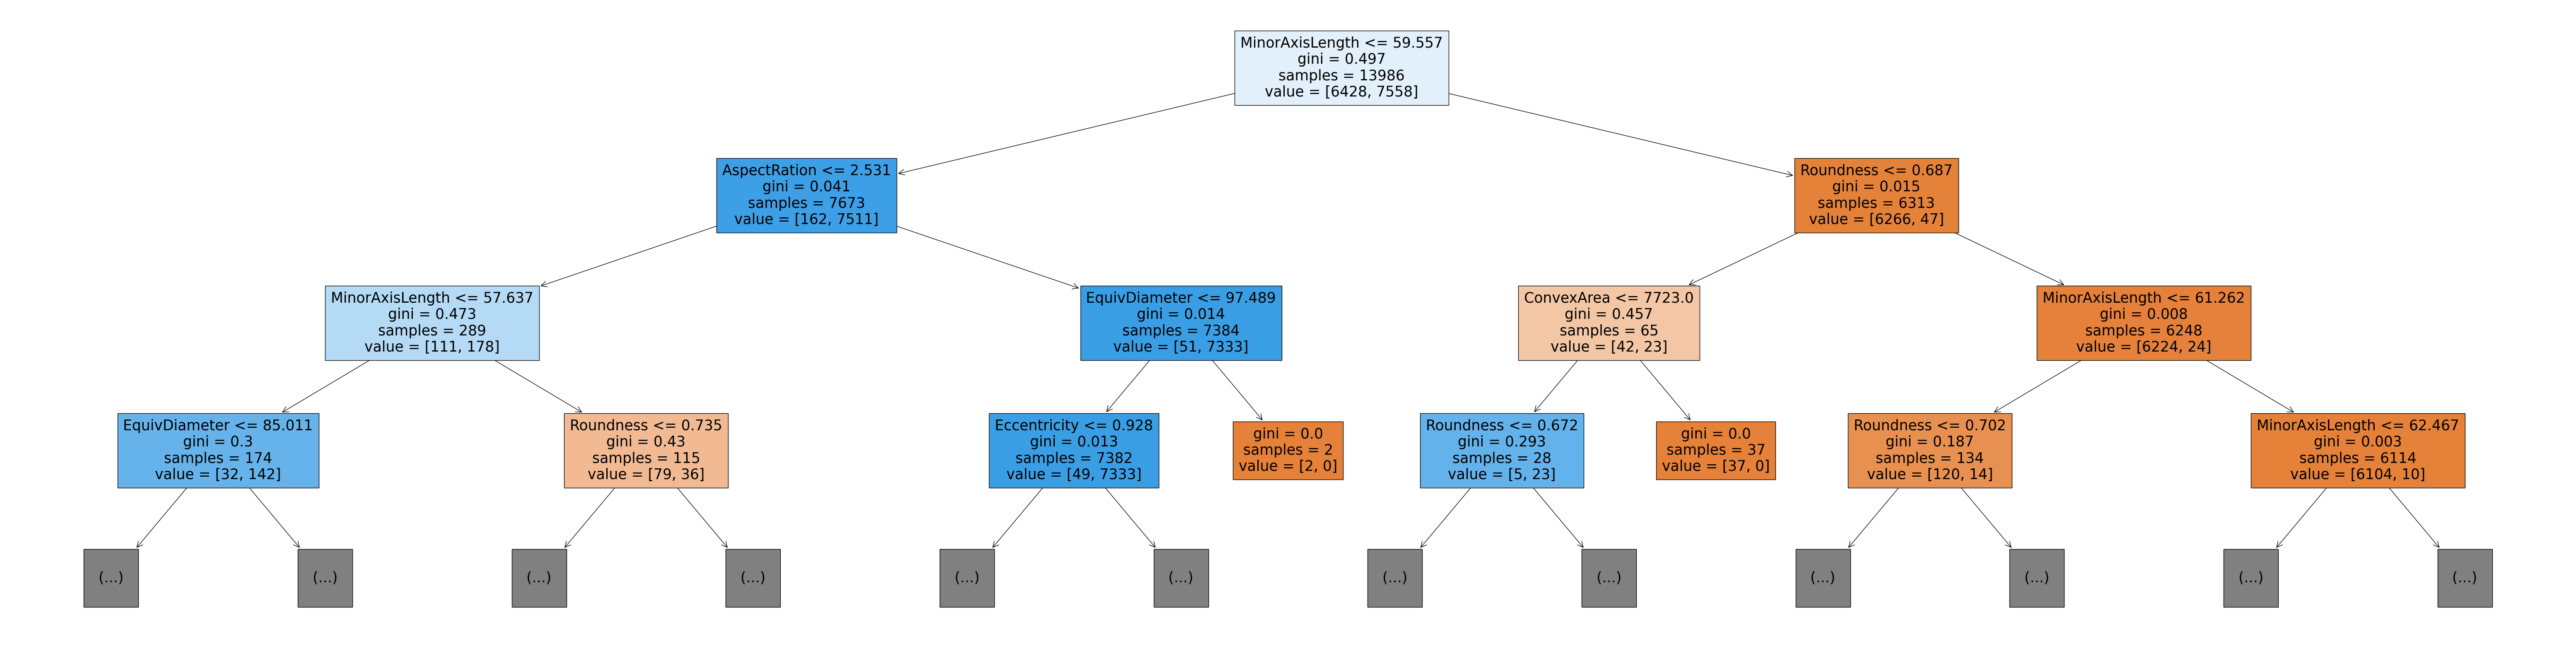

In [50]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(dt, feature_names=X_train.columns, max_depth=3, filled=True);